# Exercise 1: Build and Plot k-Means


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.60, random_state=0)


**Step 2:** Plot the distribution of the blobs

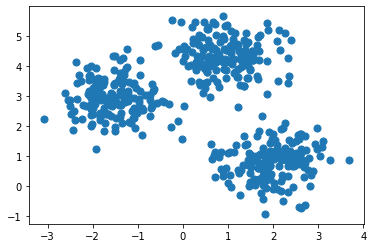

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=50);

**Step 3:** Use K-means, find the centers of these clusters

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


**Step 4:** Plot the blobs with the found centers

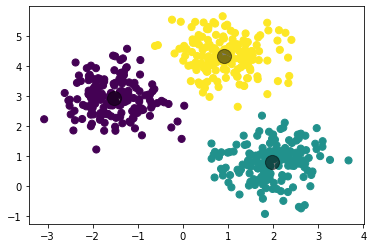

In [10]:
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

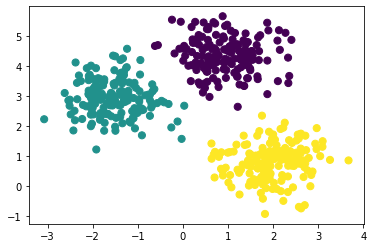

In [11]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Step 6: How about classes? How to find out where there are classes.

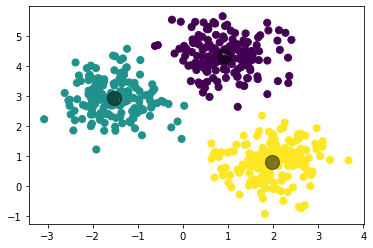

In [12]:
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans



**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [24]:
iris = datasets.load_iris()




Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

In [25]:
X = iris.data
y = iris.target




**Step 4:** Plot a graph to look at 'The elbow'

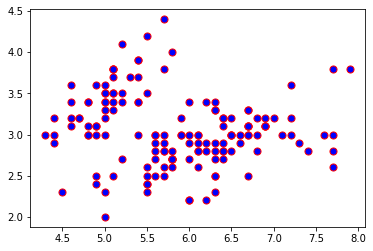

In [26]:
plt.scatter(X[:,0], X[:,1],
             color='blue', marker='o', edgecolor='red', s=50)

**Step 5:** Apply the best K for your k-means clustering

In [27]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


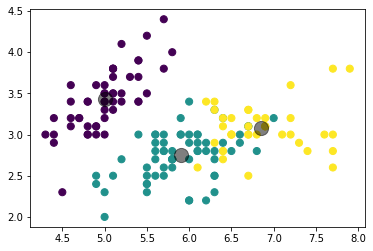

In [28]:
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side

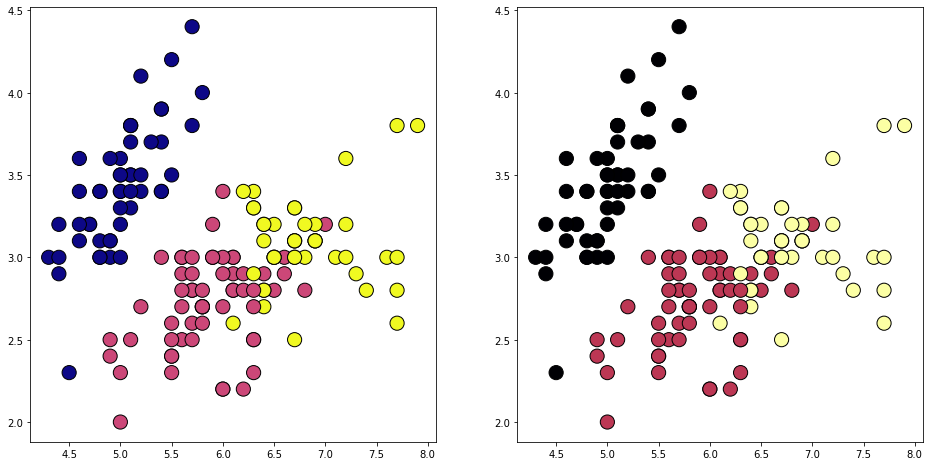

In [32]:
new_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='plasma',edgecolor='k', s=200)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='inferno',edgecolor='k', s=200)

